# Programming for Data Science and Artificial Intelligence

## 5 Supervised Learning - Regression

### Readings: 
- [GERON] Ch4
- [VANDER] Ch5
- [HASTIE] Ch3
- https://scikit-learn.org/stable/modules/linear_model.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Regression is a supervised algorithm to make prediction based on continous y values.  

For example, given the following data:

| | Egg price  | Gold price    | Oil price   | GDP   |
|---:|:-------------|:-----------|:------|:------|
| 1 | 3  | 100       | 4   | 21   |
| 2 | 4  | 500    | 7   | 43     |

We want to use egg price, gold price and oil price to predict GDP.  We called egg price, gold price, oil price **features**. We called what we want to predict **labels** or **targets**.  Each row is called **sample**.  

#### Course Notations and Terms

*This is important.  Although we are only talking only about linear regression, most of these notations and terms applied to other algorithms as well.*

To make our life easier later, we shall use the following notations throughout our course.  $x_j^{(i)}$ is used to represent the i-th sample, and j-th feature. For example, $x_1^{(1)}$ denote egg price of the first sample (i.e., 100), $x_2^{(1)}$ for gold price of the first sample (i.e., 4), and $x_3^{(1)}$ for oil price of the first sample (i.e., 21).  We use bold captial $X$ to denote the whole matrix of features with $m$ rows of samples and $n$ columns of features.  For compliance to python, we shall called that the **shape** of $X$ as $(m, n)$.  We use $y^{(i)}$ to represent the targets/labels of the i-th sample, where when we do not specify the $i$, i.e., $y$ refers to the whole vector of targets with shape of $(m, )$

We shall define **hypothesis function** as function which given input $X$, will output the predicted $y$.  In machine learning algorithms, we must **learn** and **train** this function to output predicted y as close to actual y.  To differentiate between actual and predicted $y$, we commonly called predicted $y$ as $\hat{y}$ (read as yhat)

For linear regression, the hypothesis function (denoted as $h_{\theta}(x)$ which means $h$ depends on $x$ parametize by $\theta$) is defined as followed.  

\begin{align*}
h_\theta(x) &= \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n \tag{A}\\
&= \Sigma_{i=0}^n \theta_ix_i  \tag{B}\\
&= \theta^Tx \tag{C}
\end{align*}

Here $\theta$ are called **parameters** or **weights** or **coefficients** that parameterize the linear mappings from $X$ -> $y$.  Also, we commonly don't write equations in the (A) form.  We called (B) form as the summation form and (C) as the **vectorized** form.  Since vectorized form resemble closely to python programming and will make our code clean without many for loops, this course will write in vectorized form when possible.  Note that in equation B, to be mathematically correct, we make $x_0 = 1$ for the intercept term.

We shall further define a **training** set which is subset of the whole dataset used to **train** the hypothesis function so that it can accurately predict $y$.  The resulting hypothesis function is called **model**.  We also shall define a **testing** set which is also a subset of the whole dataset used to **test** the score of the model.  The common practice is to split $70/80\%$ for training set and $30/20\%$ for testing set.

#### Gradient Descent

As you can probably realize, training here refers to training the $\theta$.  How do we pick or learn the paremeters $\theta$?  One reasonable way is to make $h_\theta(x)$ close to $y$, at least for the training examples we have.  To formalize this, we shall define a function that measures, for a given $\theta$, how close the $h(x^{(i)})$ are to the corresponding $y^{(i)}$.  We called this function the **cost function** or **loss function** (denoted as $J$):

$$J(\theta) = \frac{1}{2}\Sigma_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$$

We want to choose $\theta$ so as to minimize $J(\theta)$.  Such minimization problem will be generally called as **optimization problems**.  Any solution that can help us find the optimal values is called **optimization algorithms**.  Commonly, in such optimization problem, we starts with some random values for $\theta$ (e.g., zeros), and then repeatedly changes $\theta$ to make $J(\theta)$ smaller, until hopefully we converge to a value of $\theta$ that minimizes $J(\theta)$.  

One such optimization algorithm to do that is called **gradient descent** algorithm, which starts with some initial $\theta$, and repeatedly performs the update:

$$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
 
This update is simultaneously performed for all values of $j=0, 1, \cdots, n$.  Here, $\alpha$ is called the **learning rate**, ranging from 0 to 1.  Commonly, we tried 0.001 as default, and this value must be **fine-tuned** in order to know what value is the best.  Any parameters such as learning rate that we need to fine-tuned through trial and errors are called **hyperparameters**.

In order to implement this algorithm, we have to find the **partial derivative of the loss function in respect to each $\theta_j$**.  Let's try the partial derivative of our loss function in respect to $\theta_j$.  Also, let's first work it out for only one training example first as follows:

$$
\begin{aligned}
\frac{\partial J}{\partial \theta_j} &= \frac{\partial}{\partial \theta_j} \frac{1}{2}(h_\theta(x) - y)^2 \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} (h_\theta(x) - y) \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} \big(\Sigma_{i=0}^n \theta_ix_i - y\big) \\
&= (h_\theta(x) - y)x_j
\end{aligned}
$$

This rule has several properties that seem natural and intuitive. For instance, the magnitude of the update is proportional to the **error** term $h_\theta(x) - y$; thus, for instance, if we are encountering a training example on which our prediction nearly matches the actual value of $y^{(i)}$, then we find that there is little need to change the parameters; in contrast, a larger change to the parameters will be made if our prediction has a large error (i.e., if it is very far from $y^{(i)}$).

To modify the update rule for whole training example, we revise the update rule to include the summation as

$$\theta_j := \theta_j - \alpha * \Sigma_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j \tag{for every $j$}$$

Notice that minus sign which indicates **gradient descent**.  We can simply flip the sign to plus and called it as **gradient ascent**, both of which give the same answer.

$$\theta_j := \theta_j + \alpha * \Sigma_{i=1}^m(y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)} \tag{for every $j$}$$

Since this gradient descent calculates gradient using every example in the entire training set, we called this as **batch gradient descent**.

Sometimes, performing batch gradient descent can be slow, thus we can use **stochastic gradient descent** which refers to looking at only one training example, where we can pick with or without replacement.  Here, **without replacement** refers to the process in which no same sample is used in the same **epoch**.  Here epoch means one  iteration which the whole training set is being exhausted.  Thus, in without replacement, we simply loop from $i =1$ to $m$ for one epoch.

$$ \theta_j := \theta_j - \alpha *(h_\theta(x)^{(i)}-y^{(i)})x_j \tag{for every $j$}$$

Although **stochastic gradient descent** may be faster, it rarely converges to the optimum given its randomness.  A middle ground is **mini-batch gradient descent** which can be expressed as

$$\theta_j := \theta_j + \alpha * \Sigma_{i=start}^{batchsize}(y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)} \tag{for every $j$}$$

Similarly, we can do this with or without replacement.  In without replacement, we simply chop evenly and exhaust the whole training set for one epoch.

#### Closed form

Gradient descent gives one possible mean for minimizing $J$, which uses iterative approach and may take time.  In the situation where we know that our cost function is strictly concave or convex, we can explicitly take its derivative to zero.  This process of derivation is called obtaining the **normal equations** or **closed form**. 

The **closed form** of linear regression can be derived easily.  Let $X$ be a matrix of shape $(m, n)$, $\theta$ as shape $(n, )$, and $Y$ as vector of shape $(m, )$.  Instead of writing the cost function as power of square, we shall write it in matrix multiplication as follows:

$$\frac{\partial J}{\partial \theta} (X\theta - Y)^T*(X\theta-Y)$$

Recall the following properties:

$$\frac{\partial J}{\partial X} X^TX=2X \tag{A}$$
$$\frac{\partial J}{\partial X} AX=A^T$$
$$(XY)^T = Y^TX^T$$

Therefore

\begin{align*}
\frac{\partial J}{\partial \theta} (X\theta - Y)^T*(X\theta-Y) &= \frac{\partial J}{\partial \theta} (\theta^TX^TX\theta - \theta^TX^TY - Y^TX\theta + Y^TY)\\
&= 2X^TX\theta - 2X^TY \tag{see note*}\\
&= X^TX\theta - X^TY = 0 \tag{set derivative to 0}\\
&= \theta = (X^TX)^{-1}X^TY
\end{align*}


Note*: Since $X\theta$ is a vector, and so is $Y$, it doesn't matter what the order is, thus we can simply add them to 2.  Also, we got 2 in front of the first part because we have two $\theta$ (used the property A)


**Why not closed form always**.  The answer is simple.  It does not always exists or possible, for example, the cost function is not convex or concave.  But of course, if it exists, we usually prefer closed form given that it is usually faster than gradient descent.  Nevertheless, as you can see, taking inverse of huge number of features can be expensive, thus it is also not always straightforward thing to always prefer closed form.

Yes, that's it for most of the theoretical stuff.  Let's start implementing some of these concepts so we can better understand them.

After we implement them from scratch, we shall explore them further using sklearn which will save us a lot of time from implementing from scratch and also comes with a lot of nice utilities.

### Algorithm 1: Closed Form

The closed form is a normal equations derived from setting the derivatives = 0.  By performing only some inverse operations and matrix multiplication, we will be able to get the theta.

$$\theta = (X^TX)^{-1}X^TY$$

When closed form is available, is doable (can be inversed - can use pseudoinverse), and with not many features (i.e., inverse can be slow), it is recommended to always use closed form.  

**Implementation steps:**

1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m, )$
        - $w$ -> $(n, )$
        - where $m$ is number of samples
        - where $n$ is number of features
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Plug everything into the equation.  Here we shall use X_train to retrieve the $\theta$
$$\theta = (X^TX)^{-1}X^TY$$

3. We simply using the $\theta$, we can perform a dot product with our X_test which will give us $\hat{y}$.

4. We then calculate the errors using mean-squared-error function:

$$\frac{1}{m}\Sigma_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$$

Note that it's a bit different from our $J(\theta)$ because $J(\theta)$ puts $\frac{1}{2}$ instead of $\frac{1}{m}$ for mathematical convenience for derivatives, since we know changing constants do not change the optimization results.


#### 1.1 Get your X and y in the right shape

In [2]:
#1. Let's load some boston data 
#as our regression case study
from sklearn.datasets import load_boston
#type - Bunch
#Bunch - dictionary of numpy data
#boston.feature_names
#print(boston)
boston = load_boston()

In [3]:
X = boston.data
X.shape #number of samples, number of features

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

In [4]:
y = boston.target

In [5]:
#number of rows in X is the same as number of rows in y
#because so we have yhat for all y
assert m == y.shape[0] 

#### 1.2 Feature scale your data to reach faster convergence

In [6]:
#I want to standardize my data so that mean is 0, variance is 1
#average across each feature, NOT across each sample
#Why we need to standardize
#Because standardizing usually allows us to reach convergence faster
#Why -> because the values are within smaller range
#Thus, the gradients are also within limited range, and NOT go crazy

from sklearn.preprocessing import StandardScaler

#1. StandardScaler.fit(X)  #this scaler (or self) knows the mean and std so now
# it knows how to transform data
#2  X = StandardScaler.transform(X)  #not in place; will return something

#1. StandardScaler.fit_transform(X) -> 1 and 2 sequentially

#create an object of StandardScaler
#StandardScaler is a class
#scaler is called instance/object

#ALMOST always, feature scale your data using normalization or standardization
#If you assume your data is gaussian, use standardization, otherwise, you do the normalization

scaler = StandardScaler()

X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [7]:
#what is the appropriate size for test data
#70/30 (small dataset); 80/20 (medium dataset); 90/10 (large dataset);
#why large dataset, can set test size to 10, because
#10% of large dataset is already enough for testing accuracy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

assert len(X_train)  == len(y_train)
assert len(X_test) == len(y_test)

#### 1.4 Add intercepts

In [8]:
#What is the shape of X they want
#(number of samples, number of features) --> correct shape
# for closed form formula
#How about the intercept
#w0 is OUR intercept
#what is the shape of w -->(n+1, )
#What is the shape of intercept --->(m, 1)
#X = [1 2 3     @  [w0
#     1 4 6         w1
#     1 9 1         w2 
#     1 10 2 ] 

#np.ones((shape))
intercept = np.ones((X_train.shape[0], 1))

#concatenate the intercept based on axis=1
X_train = np.concatenate((intercept, X_train), axis=1)

#np.ones((shape))
intercept = np.ones((X_test.shape[0], 1))

#concatenate the intercept based on axis=1
X_test = np.concatenate((intercept, X_test), axis=1)

#### 1.5. Feature Engineering (optional)

It is sometimes useful to engineer new features (e.g., polynomial, kernels) so to create some non-linear relationships with your target.

Here we gonna skip

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [9]:
from numpy.linalg import inv

#order of operation DOES NOT MATTER
#But don't flip y before X^T for example
def closed_form(X, y):
    return inv(X.T @ X) @ X.T @ y

In [10]:
#let's use the closed_form to find the theta
theta = closed_form(X_train, y_train)
theta  #<------this is our model

array([ 2.25860429e+01, -9.31959893e-01,  1.15022934e+00,  1.67895103e-01,
        7.74252033e-01, -2.34006186e+00,  2.02772542e+00, -1.83777607e-02,
       -3.52881939e+00,  3.12871992e+00, -2.35482866e+00, -2.01528424e+00,
        9.39115715e-01, -3.99583047e+00])

#### 2. Compute accuracy/loss

In [11]:
#Compute the accuracy/loss

yhat = X_test @ theta #==> X (m, n+1)  @ (n+1, ) w ==> (m, ) y

#if I want to compare yhat and y, I need to make sure they are the same shape
assert y_test.shape == yhat.shape

In [12]:
#get the mse
mse = ((y_test - yhat)**2).sum() / X_test.shape[0]
print("Mean squared errors: ", mse)

Mean squared errors:  23.406961422718172


### Algorithm 2: Batch Gradient Descent

The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m, )$
        - $w$ -> $(n, )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the mean squared error
    $$J = \frac{\Sigma_{i=1}^{m}(h-y)^2}{2}$$
    where $h$ is simply
    $$ h = \theta^Tx $$
3. Calculate the gradient based on the loss
    - The gradient of the loss function is
    $$\frac{\partial J}{\partial \theta_j} = \Sigma_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

#### 1. Define your algorithm

In [13]:
from time import time

#Step 1: Prepare your data
#X_train, X_test have intercepts that are being concatenated to the data
#[1, features
# 1, features....]

#making sure our X_train has same sample size as y_train
assert X_train.shape[0] == y_train.shape[0]

#initialize our w
#We don't have to do X.shape[1] + 1 because our X_train already has the
#intercept
#w = theta/beta/coefficients
theta = np.zeros(X_train.shape[1])

#define the learning rate
#later on, you gonna know that it should be better to make it slowly decreasing
#once we perform a lot of iterations, we want the update to slow down, so it converges better
alpha = 0.0001

#define our max_iter
#typical to call it epochs <---ml people likes to call it
max_iter = 1000

loss_old = 10000

tol = 0.0001

iter_stop = 0

def h_theta(X, theta):
    return X @ theta

def mse(yhat, y):
    return ((yhat - y)**2 / yhat.shape[0]).sum()

def gradient(X, error):
    return X.T @ error

start = time()

#define your for loop
for i in range(max_iter):
    
    #1. yhat = X @ w
    #prediction
    #yhat (m, ) = (m, n) @ (n, )
    yhat = h_theta(X_train, theta)

    #2. error = yhat - y_train
    #error for use to calculate gradients
    #error (m, ) = (m, ) - (m, )
    error = yhat - y_train

    #3. grad = X.T @ error
    #grad (n, ) = (n, m) @ (m, )
    #grad for each feature j
    grad = gradient(X_train, error)

    #4. w = w - alpha * grad
    #update w
    #w (n, ) = (n, ) - scalar * (n, )
    theta = theta - alpha * grad

time_taken = time() - start

#### 2. Compute accuracy/loss

In [14]:
#we got our lovely w
#now it's time to check our accuracy
#1. Make prediction
yhat = h_theta(X_test, theta)

#2. Calculate mean squared errors
mse = mse(yhat, y_test)

#print the mse
print("MSE: ", mse)
print("Stop at iteration: ", iter_stop)
print("Time used: ", time_taken)

MSE:  23.288128316865823
Stop at iteration:  839
Time used:  0.02283024787902832


### ===Task===

1. Implement early stopping in which if the absolute difference between old loss and new loss does not exceed certain threshold, we abort the learning.

2. Implement options for stochastic gradient descent in which we use only one sample for training.  Make sure that sample does not repeat unless all samples are read at least once already.

3. Put everything into class.

### Algorithm 3: Stochastic Gradient Descent

The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m, )$
        - $w$ -> $(n, )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
3. Calculate the gradient based on the loss
    - **This differs from batch gradient descent that it only uses one sample to estimate the loss and gradient**
        $$\frac{\partial J}{\partial \theta_j} = (h^{(i)}-y^{(i)})x_j$$
4. Update the theta
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

#### 1. Define your algorithm

In [30]:
#Stochastic version
def h_theta(X, w):
    '''
    Input:
        X shape (m, n)
        w shape (n, )
    Returns: 
        (m, )
    '''
    return X @ w

def mse(yhat, y):
    return ((yhat - y)**2 / yhat.shape[0]).sum()

def single_mse(yhat, y):
    #yhat (1, ) - (1, ) ** 2
    return (yhat - y)**2

def delta_loss(new, old, tol):
    return np.abs(loss_new - loss_old) < tol

def gradient(X, error):
    return X.T @ error

#initialize our w
#We don't have to do X.shape[1] + 1 because our X_train already has the
#intercept
#w = theta/beta/coefficients
theta = np.zeros(X_train.shape[1])

#define the learning rate
#later on, you gonna know that it should be better to make it slowly decreasing
#once we perform a lot of iterations, we want the update to slow down, so it converges better
alpha = 0.00001
loss_old = 10000
tol = 0.0001
iter_stop = 0
max_epochs = 10000

start = time()

#define your for loop
for epoch in range(max_epochs):  #max_iter is the same as epochs

    #Without replacement
    for i in range(X_train.shape[0]):
#         i = np.random.randint(X_train.shape[0])  <----#with replacement but take out the outer for loop

        #1. yhat = X_i @ w
        #X_i (1, n)
        X_i = X_train[i, :].reshape(1, -1)

        #prediction
        #yhat (1, ) = (1, n) @ (n, )
        yhat = h_theta(X_i, theta)

        #2. error = yhat - y_i
        #y_i (1, )
        y_i = y_train[i]
        #error for use to calculate gradients
        #error (1, ) = (1, ) - (1, )
        error = yhat - y_i

        #2.1 early stopping
        #so we don't go through all max_iter iterations
        # (yi_hat - yi )^2 / m  <--- mse
        #loss_new (scalar) = ((m, ) - (m, ) **2 / m).sum()
        loss_new = single_mse(yhat, y_i)
        if delta_loss(loss_new, loss_old, tol):  #np.allclose
            iter_stop = epoch
            break
        loss_old = loss_new

        #3. grad = X.T @ error
        #grad (n, ) = (n, 1) @ (1, )
        #grad for each feature j
        grad = gradient(X_i, error)

        #4. w = w - alpha * grad
        #update w
        #w (n, ) = (n, ) - scalar * (n, )
        theta = theta - alpha * grad

time_taken = time() - start

#### 2. Compute accuracy/loss

In [31]:
#we got our lovely w
#now it's time to check our accuracy
#1. Make prediction
yhat = h_theta(X_test, theta)

#2. Calculate mean squared errors
mse = mse(yhat, y_test)

#print the mse
print("MSE: ", mse)
print("Stop at iteration: ", iter_stop)
print("Time used: ", time_taken)

#the time taken is strangely higher than gradient descent
#perhaps using stochastic with decay learning rate may give us
#a better chance

MSE:  335.38599959757323
Stop at iteration:  0
Time used:  42.0216109752655


### Algorithm 4: Mini-Batch Gradient Descent

The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m, )$
        - $w$ -> $(n, )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
3. Calculate the gradient based on the loss
    - **This differs from batch gradient descent that it only uses a subset of samples to estimate the loss and gradient**
        $$\frac{\partial J}{\partial \theta_j} = \Sigma_{i=start}^{batch}(h^{(i)}-y^{(i)})x_j$$
    where start is a randomized number within the range of $m$ and batch is a predefined batch size, typically around 100 to 500
4. Update the theta
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

I will not implement this, but leave to your exercise.  Enjoy!

### Sklearn way

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

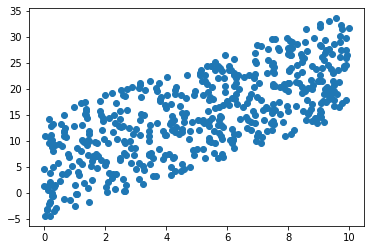

In [18]:
#let's create a scatter points with a = 2 and b = -5
rng = np.random.RandomState(1)
x = 10 * rng.rand(500)   #500 numbers between 0 and 1
y = 2*x - 5 + 20 * rng.rand(500)  #lets add some noise between 0 and 1

plt.scatter(x, y)

Text(1, 24, 'adjusted $r^2$ = 0.495')

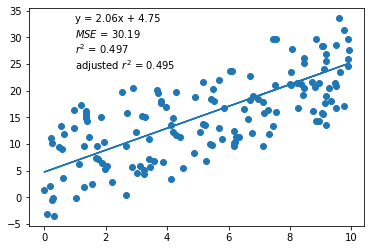

In [19]:
#let's create a model to fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as model_selection
        
#make sure our X can be inp utted into sklearn
X = x[:, np.newaxis]

#generate Xtrain, Xtest, ytrain, ytest
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                X, y, test_size = 0.3, random_state=99)

model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)  #plot the fitted line
plt.text(1, 33, f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

#measure variance of residuals, or non-fit
#$(1/n)sigma(y - f(x))^2) where SSE = sigma(y-f(x))^2
plt.text(1, 30, f"$MSE$ = {mean_squared_error(y_test, y_pred):.2f}")

#measures goodness of fit
#1 - SSE/TSS  where TSS = sigma(y-ymean)^2
#r^2 can be negative, when fit without an intercept
#We ALMOST never fit without the intercept unless
#you are sure your data comes through the origin (0, 0), e.g., height, width, but NOT house value!
#r^2 upper bound is 1, lower bound can be anything
plt.text(1, 27, f"$r^2$ = {r2_score(y_test, y_pred):.3f}")

#calculate adjusted rsquare
#take IV into consideration, to balance out possible overfitting
#increases only if new predictor (x) enhances the model
n = X_train.shape[0]  #n samples
p = X_train.shape[1] #n features
adjusted_rsqrt = 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
plt.text(1, 24, f"adjusted $r^2$ = {adjusted_rsqrt:.3f}")

### Polynomial Regression

Limitation of simple linear regression comes when we have non-linear data.  We can simply counter polynomial regression.  For example, a degree-1 polynomial fits a straight line to the data like this: 

$$y = ax + b$$  

A degree-3 polynomial fits a cubic curve to the data 

$$y = ax^3 + bx^2 + cx + d$$

In scikit learn, we can implement this using a polynomial preprocessor which translate data into its polynomials.

For example, if our x is 

<code>x = np.array([1, 2, 3, 4, 5])</code>

If we perform polynomial transformation like this:

<code>poly_X = PolynomialFeatures(degree = 3).fit_transform(X)</code>
    
X2 will look like this:

<code>[[ 1, 1, 1]
 [ 2, 4, 8]
 [ 3, 9, 27]
 [ 4, 16, 64]
 [ 5, 25, 125]]</code>
 
 Now our new feature_engineered X has one column representing x, second column representing $x^2$, and third column representing $x^3$.  Now the y becomes 
 
 $$ y = ax^3 + bx^2 + cx $$ 
 
You may wonder where is d.  d is simply the noise happening when we fit the model with the given x.   Another point you have to be aware is that **this is NOT a non-linear model**.  It remains a linear model as the weights (a, b, c) associated with the features are still linear.  $x^2$ is simply a feature.   However, the curve that we are fitting is polynomial in nature.

Now let's look at some example:

===Performing polynomial regression with deg:  1 ======
Coeff:  [ 0.         -0.95004935]
r^2 = 0.518
MSE = 45.82
adjusted $r^2$ = 0.517
===Performing polynomial regression with deg:  3 ======
Coeff:  [ 0.00000000e+00 -3.86559278e+00  1.48738477e-01 -2.00386767e-03]
r^2 = 0.669
MSE = 31.50
adjusted $r^2$ = 0.668
===Performing polynomial regression with deg:  5 ======
Coeff:  [ 0.00000000e+00 -1.19911168e+01  1.27281826e+00 -6.82738394e-02
  1.72606825e-03 -1.63199416e-05]
r^2 = 0.696
MSE = 28.86
adjusted $r^2$ = 0.696


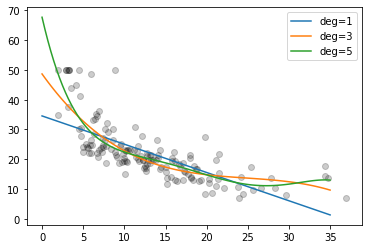

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

# #for getting some info
# print(boston.keys())
# print('\n')
# print(boston.data.shape)
# print('\n')
# print(boston.feature_names)
# print(boston.DESCR)

X = boston.data[:, 12][:, np.newaxis]  #% lower status of the population
y = boston.target

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state=5)

#let's try to fit the model using 1, 3, 5 degrees....
for ix, deg in enumerate([1, 3, 5]):
    print("===Performing polynomial regression with deg: ", deg, "======")
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X_test)
    
    #plotting smooth curve by creating lots of x1
    #we can also plot X_test against y_pred, but since X_test is not 
    #continuous, graph would look a bit ugly
    X_plot = np.linspace(0, 35, 100)[:, np.newaxis]
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f'deg={deg}')
    
    print("Coeff: ", model.named_steps['linearregression'].coef_)
    print(f"r^2 = {r2_score(y_test, y_pred):.3f}")
    print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
    n, p = X.shape[0], X.shape[1]
    adjusted_rsqrt = 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
    print(f"adjusted $r^2$ = {adjusted_rsqrt:.3f}")

#plot y actual to compare with the three models
plt.scatter(X_test, y_test, color='black', alpha=0.2)

plt.legend(loc='best')

### Validation Curve

'\ntraining score is typically ALWAYS higher than validation score; \nvalidation score reaches a maximum around 6, before\ndropping off as the model becomes over-fit\nThus, the best tradeoff between bias and variance\nis at 6th order of polynomials\n\nOne rule of thumb: Validation score matters more than training score!\n'

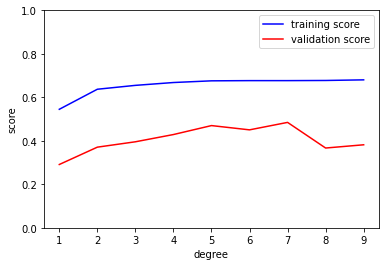

In [21]:
#a good following question to ask is which model provides
#a good tradeoff between bias (underfitting) and variance (over-fitting)?
#we can use validation curve

from sklearn.model_selection import validation_curve

degree = np.arange(1, 10)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

#to get the available params, do PolynomialFeatures().get_params().keys()
#for param_name, type print(model), append them with __
#read more here --> https://scikit-learn.org/stable/modules/compose.html#pipeline
train_score, val_score = validation_curve(model, X, y,
                    param_name="polynomialfeatures__degree", param_range=degree,
                                         cv=7)

#train_score is a list of 7 scores for each degree
#thus train_score shape is (21, 7), thus you cannot
#simply plot them..likely you want to plot the median or mean

#median across all columns
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

'''
training score is typically ALWAYS higher than validation score; 
validation score reaches a maximum around 6, before
dropping off as the model becomes over-fit
Thus, the best tradeoff between bias and variance
is at 6th order of polynomials

One rule of thumb: Validation score matters more than training score!
'''

### Learning curve

There is also one important thing, i.e., scalability

Some rules:
1. A model will generally overfit a small dataset.  This mean the training score will be high, while the validation score is low
2. A model will generally underfit a large dataset; this means that the training score will decrease, but the validation score will increase
3. A validation score will always be worse than training score
Thus, one aspect we want know here is how do we know that we have enough data, such that adding more data will not improve the validation score anymore?  **Answer: Learning curves**

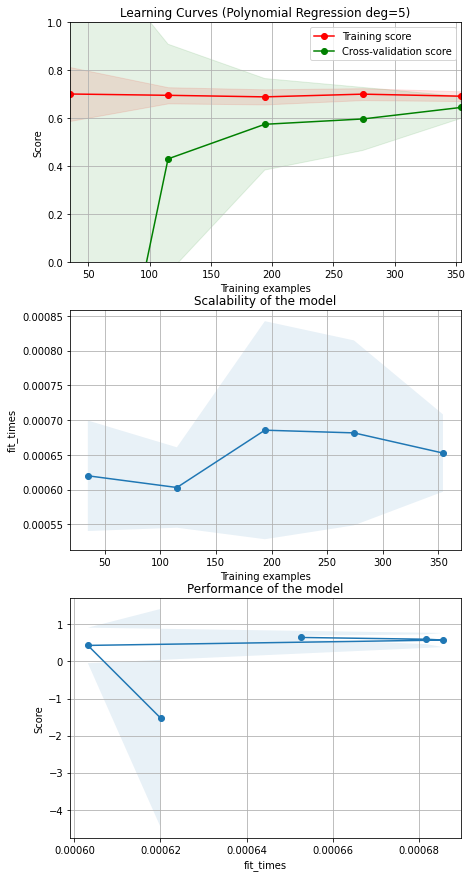

In [22]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    cv = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state=42)

    #fit_times in seconds
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=1, return_times=True)

    #perform some simple stats
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    _, ax = plt.subplots(3, 1, figsize=(7, 15))

    #plot learning curve
    ax[0].grid()
    ax[0].set_title("Learning Curves (Polynomial Regression deg=5)")
    ax[0].plot(train_sizes, train_scores_mean, 'o-', color='r',
              label="Training score")
    ax[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax[0].plot(train_sizes, test_scores_mean, 'o-', color='g',
              label="Cross-validation score")
    ax[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color='g')
    ax[0].legend(loc="best")
    ax[0].set_ylim(0, 1)
    ax[0].set_xlim(train_sizes[0], train_sizes[-1])
    ax[0].set_xlabel("Training examples")
    ax[0].set_ylabel("Score")

    #plot n_samples vs fit_times
    ax[1].grid()
    ax[1].set_title("Scalability of the model")
    ax[1].plot(train_sizes, fit_times_mean, 'o-')
    ax[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                             fit_times_mean + fit_times_std, alpha=0.1)
    ax[1].set_xlabel("Training examples")
    ax[1].set_ylabel("fit_times")

    #plot fit_time vs score
    ax[2].grid()
    ax[2].plot(fit_times_mean, test_scores_mean, 'o-')
    ax[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    ax[2].set_xlabel("fit_times")
    ax[2].set_ylabel("Score")
    ax[2].set_title("Performance of the model")
    
estimator = make_pipeline(PolynomialFeatures(5), LinearRegression())
plot_learning_curve(estimator, X, y)


### Grid Search

Validation curve gives us intuition about overfitting.  Learning curve gives us idea about sample sizes.   Once we get an intuition which model is the best, we would want to explore all possible params of a model, and see which yield the best results.

For example, for our pipeline, these are the following params that can be configured:
    - polynomial features - degree (0...21)
    - linearregression - normalize (True, False)
Of course, we can manually write for loops, but that is inefficient.  Sklearn implemented something called **Grid Search** which allows us to explore all possible parameters within one go, and return us the best model and the corresponding params.

Let's take a quick example:

Best params:  {'linearregression__normalize': False, 'polynomialfeatures__degree': 7}
Coefficients:  [ 0.00000000e+00 -1.34743451e+01  1.48845871e+00 -7.52390945e-02
  9.62720288e-04  5.19335303e-05 -1.95098219e-06  1.90973211e-08]
r^2 = 0.694
MSE = 29.10
adjusted $r^2$ = 0.693


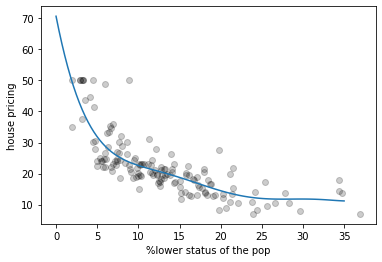

In [23]:
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning

#implement this to avoid too many clutted warnings
#also I do not want to set very high max_iter, which 
#can possibly burn my pc...
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

def plot_model(model, X, y, X_test, y_test, name,
              param_grid):
    #gridsearchcv takes in dict
    grid = GridSearchCV(model, param_grid, cv=7)

    #grid.fit will fit the model at each grid point
    grid.fit(X, y)

    #print the best parameters
    print("Best params: ", grid.best_params_)

    #we do not need to create a new estimator
    model = grid.best_estimator_

    model.fit(X, y)
    y_pred = model.predict(X_test)
    
    #plot the actual y
    plt.scatter(X_test, y_test, color='black', alpha=0.2)
    
    #plot a smooth curve of the model
    X_plot = np.linspace(0, 35, 100)[:, np.newaxis]
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot)
    plt.xlabel("%lower status of the pop")
    plt.ylabel("house pricing")
    
    #print the stats
    print("Coefficients: ", model.named_steps[name].coef_)
    print(f"r^2 = {r2_score(y_test, y_pred):.3f}")
    print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
    n, p = X.shape[0], X.shape[1]
    adjusted_rsqrt = 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
    print(f"adjusted $r^2$ = {adjusted_rsqrt:.3f}")

param_grid = {'polynomialfeatures__degree': np.arange(1, 10),
              'linearregression__normalize': [True, False]}
model = make_pipeline(PolynomialFeatures(), LinearRegression())

plot_model(model, X, y, X_test, y_test, 
           'linearregression', param_grid)

### Regularization

Sklearn implements LinearRegression() using the Ordinary Least Squares closed form solver from scipy.   OLS is simply inverting and multiplicating some matrices.  

$$\mathbf{w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$

There are several properties of OLS:

1. Treating all predictors (x1...xn) equally, i.e., unbiased method
2. Goes for the best fit, no matter what (i.e., it prefers overfitting over underfitting, or in another words, it goes for highest variances and lowest bias possible)

As you can see, OLS biggest drawback is that it does not discriminate features (i.e., it does not have any feature selection mechanism.)   For example, if my x1 is height, x2 is arm_length, and x3 is hair_length, and my y is weight.  

We can clearly know that height can predict weight, but not hair length. Another problem is that x2 is actually correlated with x1, which is commonly known as multicollinearity problem!  In the case of OLS, it will try to find the best possible combination of coefficients to make error $y - f(x)$ smallest possible.  When I say coefficients, I am refering to a, b, c and d --> ax1 + bx2 + cx3 + d  (in case of a deg 1 linear equation).     

OLS may get a really good "training" result because height is a good predictor.  However, it produces two related problem:

1. **Multicollinearity** - which causes inaccurate estimates of coefficients, and thus lead to a problem where model becomes very sensitve to small changes
2. **Irrelevant features** - hair_length got into the equation and contaminates the model.

All will result in inaccurate model and overfitting.

The good question to ask is "is it possible to let OLS automatically remove hair_length or lower its coefficients if it found that it has no/less relationship to weight".  The answer is yes.

- For multicollinearity, we use Ridge regression
- For automatic feature selection, we use Lasso regression.
- If we want both, we can use Elastic net regression
- If we want faster Elastic net when you have many features, we could try Stochastic Gradient Descent

### Ridge regression ($L_2$ regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 

$$ J(\theta) = \sum (y - h_\theta(x))^2 + \lambda\sum_{n=1}^N \theta_n^2$$

where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:



Best params:  {'polynomialfeatures__degree': 8, 'ridge__alpha': 0.0001}
Coefficients:  [ 0.00000000e+00 -4.86149886e+00  2.25808900e-01 -1.97087639e-03
 -1.11732554e-04 -2.29816006e-07  6.38885705e-08  1.40696331e-09
 -4.00316567e-11]
r^2 = 0.680
MSE = 30.43
adjusted $r^2$ = 0.679


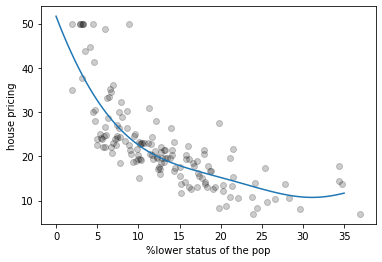

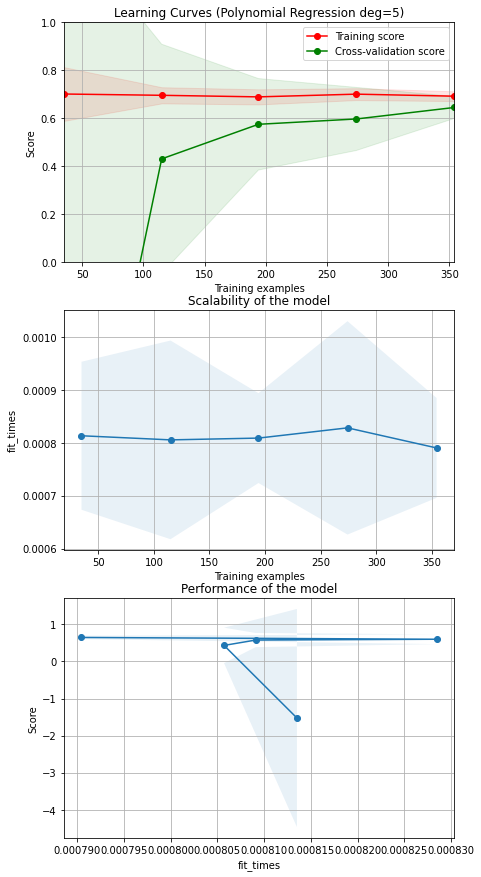

In [24]:
from sklearn.linear_model import Ridge
params_Ridge = {'polynomialfeatures__degree': np.arange(1, 10),
                'ridge__alpha': np.logspace(-1, -4, 10)}
##I put normalize=True to reach convergence faster, since it is giving me warnings...as my x value have wide range
model = make_pipeline(PolynomialFeatures(), Ridge(normalize=True))   
plot_model(model, X, y, X_test, y_test, 'ridge', params_Ridge)
plot_learning_curve(model, X, y)

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:

$$ J(\theta) = \sum (y - h_\theta(x))^2 + \lambda\sum_{n=1}^N |\theta_n|$$

Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

Best params:  {'lasso__alpha': 0.0001, 'polynomialfeatures__degree': 6}
Coefficients:  [ 0.00000000e+00 -3.85948097e+00  1.48264707e-01 -1.26858095e-03
 -4.10373134e-05  0.00000000e+00  1.74025337e-08]
r^2 = 0.670
MSE = 31.37
adjusted $r^2$ = 0.669


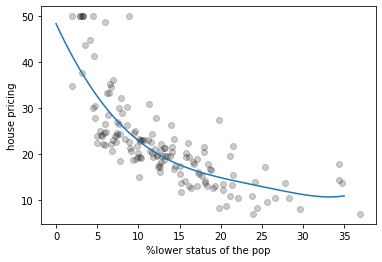

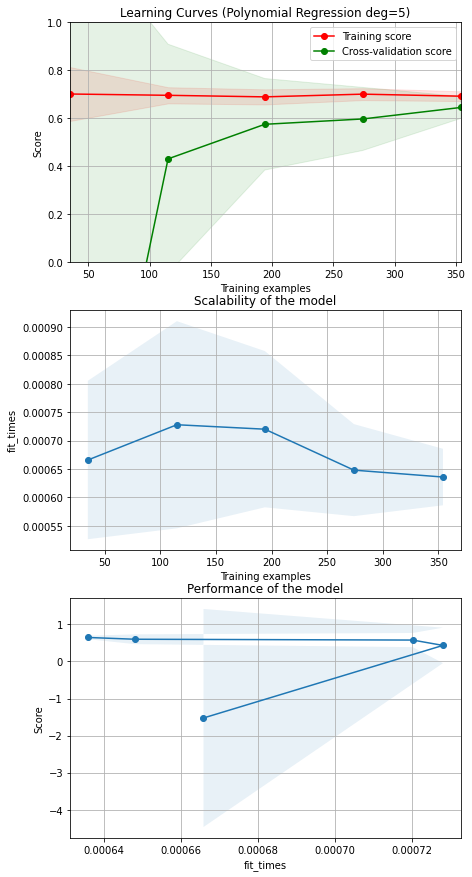

In [25]:
from sklearn.linear_model import Lasso
params_Lasso = {'polynomialfeatures__degree': np.arange(1, 10),
                'lasso__alpha': np.logspace(-1, -4, 10)}

#put max_iter since it needs more time to reach convergence
model = make_pipeline(PolynomialFeatures(), 
                      Lasso(normalize=True, tol=0.01))
plot_model(model, X, y, X_test, y_test, 'lasso', params_Lasso)
plot_learning_curve(model, X, y)

### Elastic net 

Linear regression with combined L1 and L2 regularizer

$$
Loss function = \sum (y - f(x))^2 + \alpha\sum_{n=1}^N \theta_n^2 + \alpha\sum_{n=1}^N |\theta_n|
$$


Best params:  {'elasticnet__alpha': 0.0001, 'elasticnet__l1_ratio': 1.0, 'polynomialfeatures__degree': 6}
Coefficients:  [ 0.00000000e+00 -3.85948097e+00  1.48264707e-01 -1.26858095e-03
 -4.10373134e-05  0.00000000e+00  1.74025337e-08]
r^2 = 0.670
MSE = 31.37
adjusted $r^2$ = 0.669


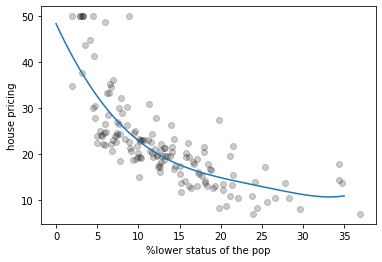

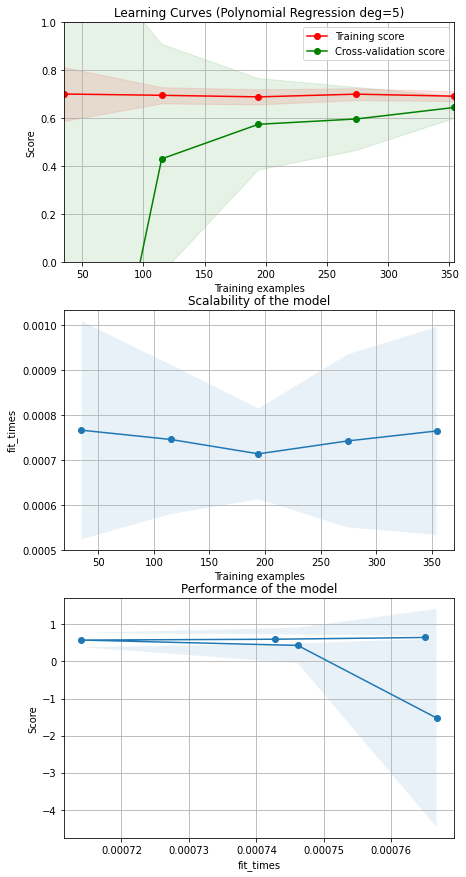

In [26]:
from sklearn.linear_model import ElasticNet
#i set tol to be low since it is eating my pc....
model = make_pipeline(PolynomialFeatures(), 
                      ElasticNet(normalize=True))
#l1_ratio = 0 the penalty is an L2 penalty. 
#For l1_ratio = 1 it is an L1 penalty. 
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
params_Elasticnet = {'polynomialfeatures__degree': np.arange(1, 10),
                'elasticnet__alpha': np.logspace(-1, -4, 10),
                "elasticnet__l1_ratio": np.linspace(0, 1, 5)}
plot_model(model, X, y, X_test, y_test, 'elasticnet', params_Elasticnet)
plot_learning_curve(model, X, y)

### Ridge or Lasso or Elastic net??

All these techniques should be almost always used, unless you are sure that all x has impact on y, and there are no collinear variables, since these techniques reduces overfitting and improve validation score.

How to choose is a little bit difficult. It is easier to understand the assumptions behind.
1.  Ridge assumes that coefficients are normally distributed.   Here, if we have collinear variables, it will equalize them thus reducing dominant effect over the model.   **In simple words, if you have many small/medium effect sized predictors, use Ridge.**
2. Lasso assumes that coefficients are Laplace distributed (in layman sense, it mean some predictors are very useful while some are completely irrelevant).   Here, Lasso has the ability to shrink coefficient to zero thus eliminate predictors that are not useful to the output, thus automatic feature selection.  **In simple words, if you have only very few predictors with medium/large effect, use Lasso.**
3.  Elastic basically is a compromise between the two, and thus take huge computation time to reach that compromise.  **If you have the resource to spare, you can use Elastic net**

In practice, if you have 1 billions row of data, you want to get a small sample, compare Lasso and Ridge with baseline. Of course, it is much better if you understand the underlying assumption of your data.  The error should give you an intuition which to use.

### Stochastic Gradient Descent

Most of above problem is either solve using a closed-form OLS matrix (i.e., inverting and multiplicating matrices)(e.g., sklearn LinearRegression or RidgeRegression) or treating the problem as a minimization problem and perform some sort of coordinate descent (e.g., sklearn Lasso, ElasticNet).

The main problem with normal gradient descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than normal Gradient Descent, instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.  

Therefore, the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to *simulated annealing*, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.




Best params:  {'polynomialfeatures__degree': 1, 'sgdregressor__alpha': 0.046415888336127795, 'sgdregressor__l1_ratio': 0.0, 'sgdregressor__learning_rate': 'invscaling', 'sgdregressor__penalty': 'l2'}
Coefficients:  [13.02391204 -1.04056893]
r^2 = 0.434
MSE = 53.82
adjusted $r^2$ = 0.433


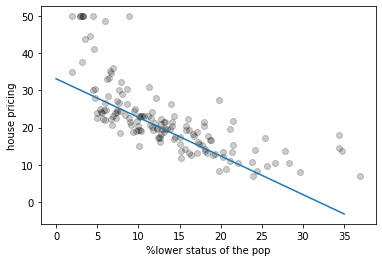

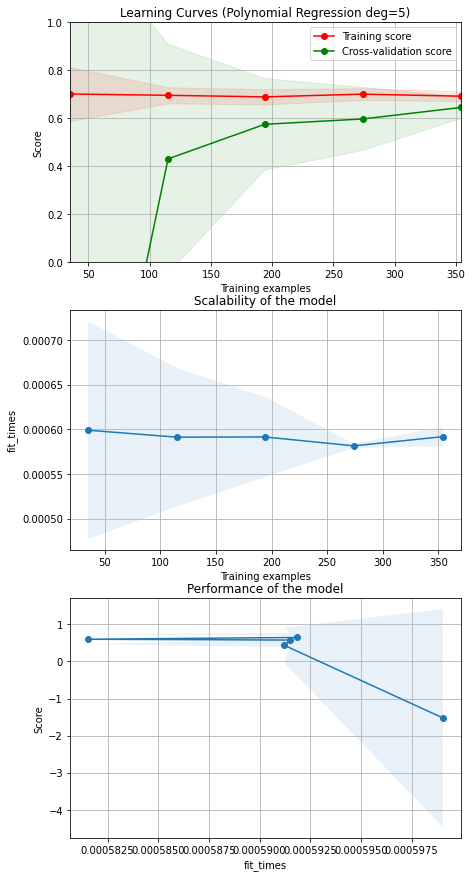

In [27]:
from sklearn.linear_model import SGDRegressor

model = make_pipeline(PolynomialFeatures(), 
                      SGDRegressor())

#l1_ratio = 0 the penalty is an L2 penalty. 
#For l1_ratio = 1 it is an L1 penalty. 
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
params_SGD = {'polynomialfeatures__degree': np.arange(1, 10),
                'sgdregressor__alpha': np.logspace(-1, -4, 10),
                'sgdregressor__penalty': ['l2', 'l1', 'elasticnet'],
                 'sgdregressor__l1_ratio': np.linspace(0, 1, 5),
              'sgdregressor__learning_rate': ['constant', 'optimal',
                                             'invscaling', 'adaptive']}
plot_model(model, X, y, X_test, y_test, 'sgdregressor', params_SGD)
plot_learning_curve(model, X, y)